# Predicting Credit Card Fraud

##### First, import data manipulation tools

In [57]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

##### Then process the data
Import it into a Panda's dataframe. The code below is transferable and will run without the need for downloading the dataset. The only difficulty is one must make sure their scikit learn is updated. If using Anaconda go to Anaconda prompt and type: `pip install -U scikit-learn`

In [58]:
from sklearn.datasets import fetch_openml

# use `as_frame` argument to get a pandas dataframe
X, y = fetch_openml(data_id='42175', return_X_y=True, as_frame=True)
print("pandas df colnames: {}".format(X.columns))

pandas df colnames: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [59]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


##### Train, Test Split
It is important to create a train, test split on the data. This way we can train our model then evaluate its performance. By including the random_state parameter in the function the results of the models will be replicable.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Preproccessing
Luckily, this dataset does not need much preproccessing. The only thing it really needs is to be scaled. By scaling the data we are ensuring that variation inside of features are being accounted for equally.

In [61]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


##### Creating Logistic Regression Model

In [62]:
from sklearn.linear_model import LogisticRegression
logisticRegress = LogisticRegression(random_state = 42)
logisticRegress.fit(X_train, y_train)
y_score1 = logisticRegress.predict_proba(X_test)[:,1]

##### Creating Decision Tree Model

In [63]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier(min_samples_leaf = 10, random_state = 42)
tree1 = tree1.fit(X_train, y_train)
y_score2 = tree1.predict_proba(X_test)[:,1]

##### Creating Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier
NeuralNet = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
NeuralNet.fit(X_train, y_train)
y_score3 = NeuralNet.predict(X_test)

##### Evaluating our model
In the cell's above, we defined and fit our models. Now to evaluate them run the code below. The first chart created is a precision recall curve. Precision asks, "for all the things you guessed were positive, how many of them actually were?" While recall asks, "of all the things that were actually positive how many did you predict correctly?" These two put together show the tradeoff between having few false negatives and few false positives. To find the best fitting model, we should look for the model with the largest area under the curve.

##### Logistic Regression Evaluation

average precision score: 0.756
roc_auc_score: 0.975
precision-recall AUC: 0.755



Text(0.5, 1.0, 'Precision-recall plot')

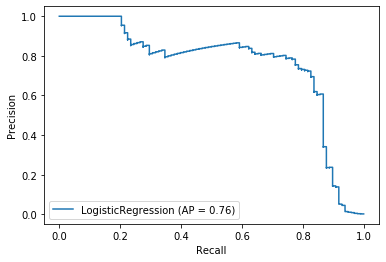

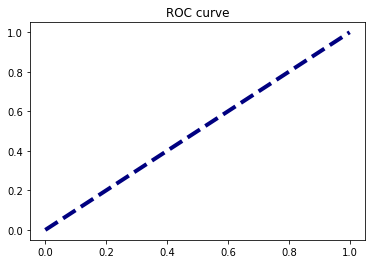

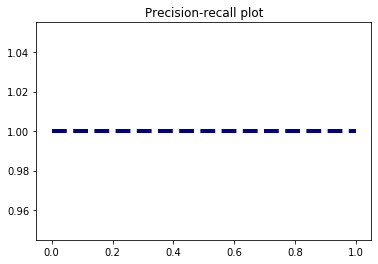

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

roc_things = []
precision_recall_things = []

roc_auc = roc_auc_score(y_test, y_score1)
fpr, tpr, _ = roc_curve(y_test, y_score1)

    
precision, recall, thresholds = precision_recall_curve(y_test, y_score1)
pr_auc = auc(recall, precision)


print('average precision score: {:.3f}'.format(average_precision_score(y_test, y_score1)))
print('roc_auc_score: {:.3f}'.format(roc_auc))
print('precision-recall AUC: {:.3f}'.format(pr_auc))
print()

plot_precision_recall_curve(logisticRegress, X_test, y_test)

roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('ROC curve')
          
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw)
ratio = y_test[y_test].shape[0] / y_test.shape[0]
plt.hlines(y=ratio, xmin=0, xmax=1, color='navy', lw=lw, linestyle='--') 
plt.title('Precision-recall plot')

##### Decision Tree Evaluation

average precision score: 0.817
roc_auc_score: 0.933
precision-recall AUC: 0.855



Text(0.5, 1.0, 'Precision-recall plot')

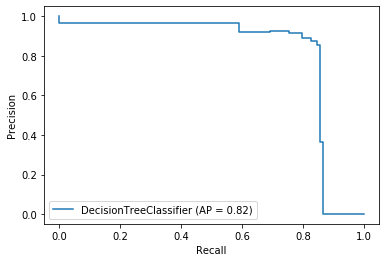

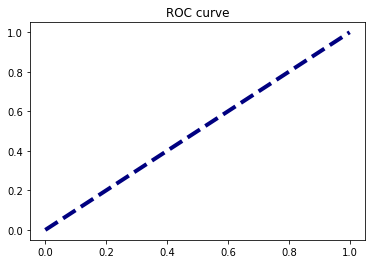

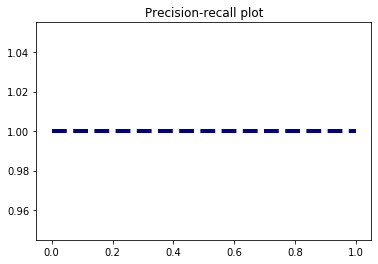

In [66]:
roc_things = []
precision_recall_things = []

roc_auc = roc_auc_score(y_test, y_score2)
fpr, tpr, _ = roc_curve(y_test, y_score2)

    
precision, recall, thresholds = precision_recall_curve(y_test, y_score2)
pr_auc = auc(recall, precision)


print('average precision score: {:.3f}'.format(average_precision_score(y_test, y_score2)))
print('roc_auc_score: {:.3f}'.format(roc_auc))
print('precision-recall AUC: {:.3f}'.format(pr_auc))
print()

plot_precision_recall_curve(tree1, X_test, y_test)

roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('ROC curve')
          
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw)
ratio = y_test[y_test].shape[0] / y_test.shape[0]
plt.hlines(y=ratio, xmin=0, xmax=1, color='navy', lw=lw, linestyle='--') 
plt.title('Precision-recall plot')

average precision score: 0.637
roc_auc_score: 0.903
precision-recall AUC: 0.798



Text(0.5, 1.0, 'Precision-recall plot')

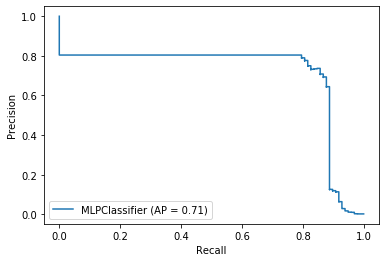

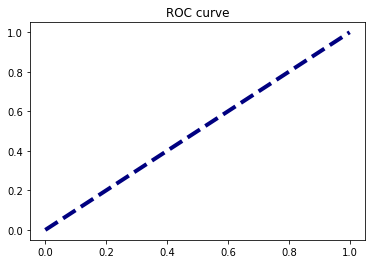

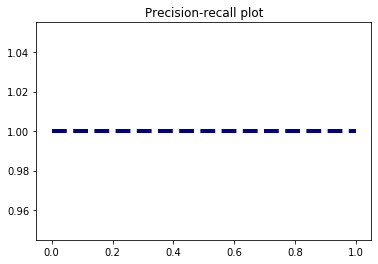

In [67]:
roc_things = []
precision_recall_things = []

roc_auc = roc_auc_score(y_test, y_score3)
fpr, tpr, _ = roc_curve(y_test, y_score3)

    
precision, recall, thresholds = precision_recall_curve(y_test, y_score3)
pr_auc = auc(recall, precision)


print('average precision score: {:.3f}'.format(average_precision_score(y_test, y_score3)))
print('roc_auc_score: {:.3f}'.format(roc_auc))
print('precision-recall AUC: {:.3f}'.format(pr_auc))
print()

plot_precision_recall_curve(NeuralNet, X_test, y_test)

roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('ROC curve')
          
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw)
ratio = y_test[y_test].shape[0] / y_test.shape[0]
plt.hlines(y=ratio, xmin=0, xmax=1, color='navy', lw=lw, linestyle='--') 
plt.title('Precision-recall plot')

##### Optimize F1
Last, the model that performed the best in terms of precision recall was the decision tree. In order to find F1 score of the Random Forest we can run the code below. The F1 score is just a weighted average of the precision and recall. It attempts to find a balance between precision and recall.

In [69]:
from scipy.stats import hmean
import numpy.ma as ma

precision, recall, thresholds = precision_recall_curve(y_test, y_score2)

# make a 2D numpy array out of our recall and precision values
a = np.column_stack((recall,precision))

# harmonic mean is only valid for values greater than 0.
# "mask" out any rows with values less than or equal to 0
# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.mask_rows.html
a = ma.masked_less_equal(a, 0)
a = ma.mask_rows(a)
f1 = hmean(a,axis=1)

# np.argmax returns the index of the largest value in an array. This will map to the threshold array that
# was associated with the precision and recall which generated that "best F1 score"
# I'm sure there's a better way to do the above, but IDK I'm a noob
threshold_that_maximizes_f1 = thresholds[np.argmax(f1)]
print('threshold that optimizes f1: {}'.format(threshold_that_maximizes_f1))

threshold that optimizes f1: 0.4
